In [1]:
import pickle
import os
import time
import numpy as np
import ast


import cooltools
import cooltools.lib.plotting
#import functions

import shutil

import pandas as pd
import warnings
import h5py 
import glob

#from scorefunctions import *
import matplotlib.pyplot as plt
import sys

/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/cooltools/lib/numutils.py:11: FutureWarning: The `cooler.tools` module is deprecated in v0.9 and will be removed in v0.10. Use `cooler.parallel` instead.
  from ._numutils import (
/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/cooltools/api/expected.py:14: FutureWarning: The `cooler.tools` module is deprecated in v0.9 and will be removed in v0.10. Use `cooler.parallel` instead.
  from cooler.tools import partition


### loading simulations

In [3]:
path_dict = {}

directory='/project/fudenber_735/polychrom/Dynamic_boundary_model/1d_sims_dynamic_boundary/dynamical_boundary_simulations/sims/'

for fname  in glob.glob(directory+'folder*'):
    path_dict[fname.split('sims/')[1][:]]= fname
path_dict = dict(sorted(path_dict.items()))

In [4]:
print(len(path_dict))

1905


### list of boundary elements 

In [5]:
ctcfrightlist = [314, 579, 1195, 3717, 3772, 3921, 4451, 5193, 5723, 6302, 6574, 6779, 7000, 9232, 9310, 9861]
ctcfleftlist = [495, 865, 1404, 2164, 3143, 3615, 3971, 4069, 4480, 4938, 5300, 5587, 6401, 7725, 8764, 9619]
lst = np.array(ctcfrightlist + ctcfleftlist)


In [6]:
### list of boundary elements on all replications

rep = 10 
mon = 1000
site = 10
lst_t = []
for i in range(rep):
    lst_t += list(np.array(lst)+i*mon*site)
print(lst_t)
    

[314, 579, 1195, 3717, 3772, 3921, 4451, 5193, 5723, 6302, 6574, 6779, 7000, 9232, 9310, 9861, 495, 865, 1404, 2164, 3143, 3615, 3971, 4069, 4480, 4938, 5300, 5587, 6401, 7725, 8764, 9619, 10314, 10579, 11195, 13717, 13772, 13921, 14451, 15193, 15723, 16302, 16574, 16779, 17000, 19232, 19310, 19861, 10495, 10865, 11404, 12164, 13143, 13615, 13971, 14069, 14480, 14938, 15300, 15587, 16401, 17725, 18764, 19619, 20314, 20579, 21195, 23717, 23772, 23921, 24451, 25193, 25723, 26302, 26574, 26779, 27000, 29232, 29310, 29861, 20495, 20865, 21404, 22164, 23143, 23615, 23971, 24069, 24480, 24938, 25300, 25587, 26401, 27725, 28764, 29619, 30314, 30579, 31195, 33717, 33772, 33921, 34451, 35193, 35723, 36302, 36574, 36779, 37000, 39232, 39310, 39861, 30495, 30865, 31404, 32164, 33143, 33615, 33971, 34069, 34480, 34938, 35300, 35587, 36401, 37725, 38764, 39619, 40314, 40579, 41195, 43717, 43772, 43921, 44451, 45193, 45723, 46302, 46574, 46779, 47000, 49232, 49310, 49861, 40495, 40865, 41404, 42164,

### functions for calculating Frip

In [7]:
def peak_positions(boundary_lst_t, window_sizes=[1]):
    peak_monomers = np.array([])
    for i in window_sizes:
        inds_to_add=[boundary_lst_t[j]+i for j in range(len(boundary_lst_t))]
        peak_monomers = np.hstack((peak_monomers,inds_to_add))
    return peak_monomers.astype(int)

def FRiP(num_sites_t, lef_positions, peak_positions ):
    
    hist,edges = np.histogram(  lef_positions  , np.arange(num_sites_t+1) )
    return np.sum(hist[peak_positions] )/len(lef_positions)

In [8]:
def peak_positions(boundary_list, window_sizes=[1]):
    """
    Calculate peak positions based on a boundary_list within window_sizes.

    Args:
        boundary_list (list): List of boundary values.
        window_sizes (list, optional): List of window sizes. Defaults to [1].

    Returns:
        np.ndarray: Array containing peak positions.
    """
    peak_monomers = np.array([])

    for i in window_sizes:
        inds_to_add = [boundary + i for boundary in boundary_list]
        peak_monomers = np.hstack((peak_monomers, inds_to_add))

    return peak_monomers.astype(int)

### visualizing some of chipseq maps

folder_face_1.0_back_0_Clife_1.0_Cof_0.1_life_1500.0_slife_1500.0_birth_0.1_pause_0.9_sep_100_site_10_monomer_1000_replica_10_steps_20.0_vel_0.33
10000
1000000
0.44251782


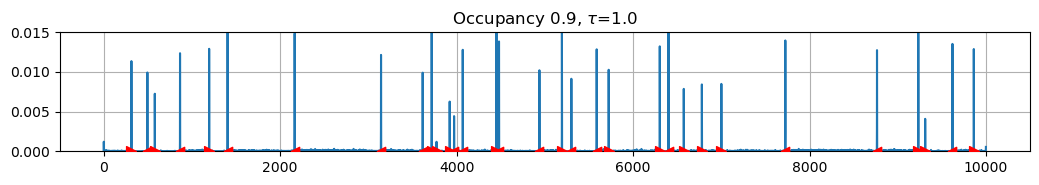

folder_face_1.0_back_0_Clife_1.0_Cof_3.0_life_1500.0_slife_1500.0_birth_0.1_pause_0.9_sep_100_site_10_monomer_1000_replica_10_steps_20.0_vel_1
10000
1000000
0.00963408


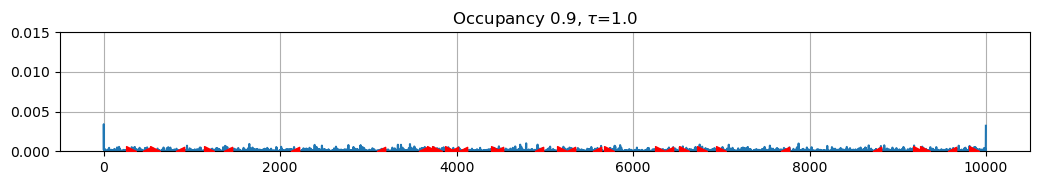

folder_face_1.0_back_0_Clife_10.0_Cof_15.0_life_1500.0_slife_1500.0_birth_0.1_pause_0.9_sep_100_site_10_monomer_1000_replica_10_steps_20.0_vel_3
10000
1000000
0.02016793


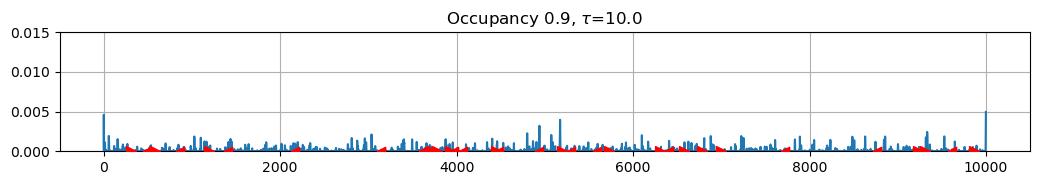

folder_face_1.0_back_0_Clife_100.0_Cof_1.25_life_166.0_slife_166.0_birth_0.1_pause_0.9_sep_100_site_10_monomer_1000_replica_10_steps_20.0_vel_0.33
10000
1000000
0.06701134


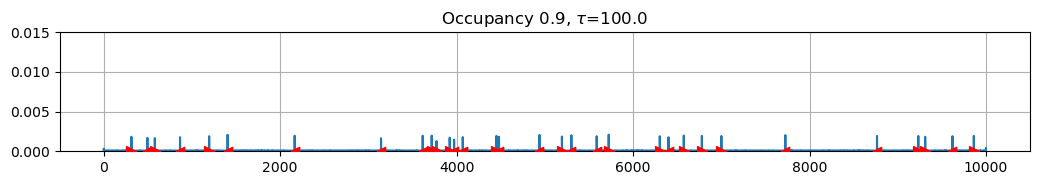

folder_face_1.0_back_0_Clife_12.5_Cof_0.1_life_500.0_slife_500.0_birth_0.1_pause_0.9_sep_100_site_10_monomer_1000_replica_10_steps_20.0_vel_1
10000
1000000
0.44054497


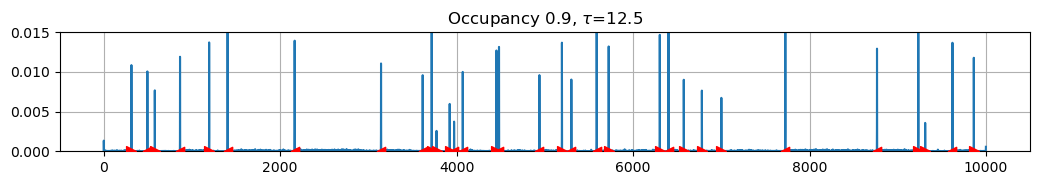

folder_face_1.0_back_0_Clife_12.5_Cof_3.0_life_500.0_slife_500.0_birth_0.1_pause_0.9_sep_100_site_10_monomer_1000_replica_10_steps_20.0_vel_3
10000
1000000
0.05973195


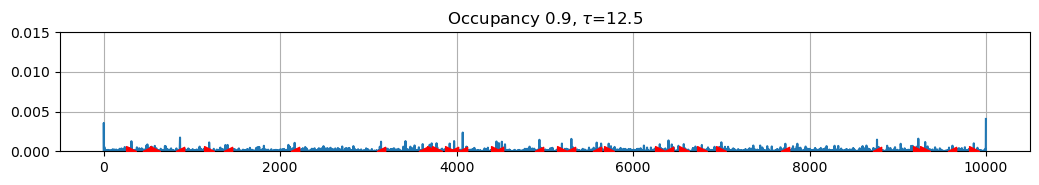

folder_face_1.0_back_0_Clife_15.0_Cof_15.0_life_1500.0_slife_1500.0_birth_0.1_pause_0.9_sep_100_site_10_monomer_1000_replica_10_steps_20.0_vel_0.33
10000
1000000
0.01524132


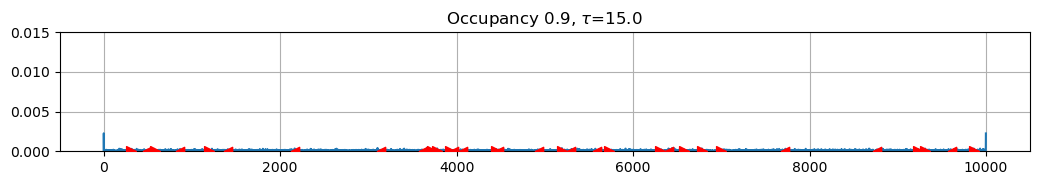

folder_face_1.0_back_0_Clife_150.0_Cof_1.25_life_1500.0_slife_1500.0_birth_0.1_pause_0.9_sep_100_site_10_monomer_1000_replica_10_steps_20.0_vel_1
10000
1000000
0.26787757


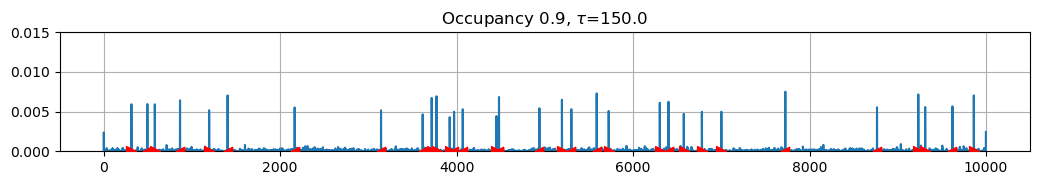

folder_face_1.0_back_0_Clife_1500.0_Cof_0.1_life_166.0_slife_166.0_birth_0.1_pause_0.9_sep_100_site_10_monomer_1000_replica_10_steps_20.0_vel_3
10000
1000000
0.43501004


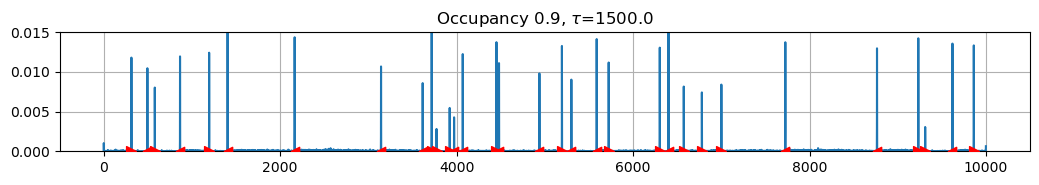

folder_face_1.0_back_0_Clife_1500.0_Cof_150.0_life_500.0_slife_500.0_birth_0.1_pause_0.9_sep_100_site_10_monomer_1000_replica_10_steps_20.0_vel_1
10000
1000000
0.34869074


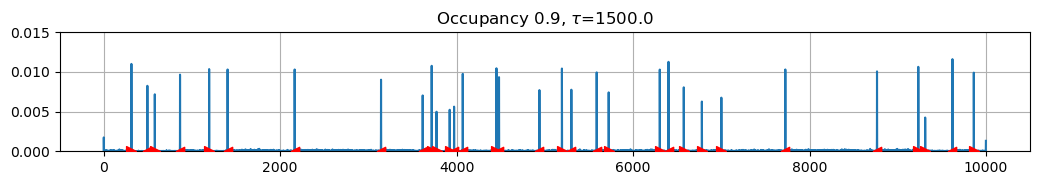

In [9]:
window_size = 1
numx,numy = 1,len(path_dict)
min_time = -500000
c=0
#plt.figure(figsize=(10.5,1.95*len(path_dict)))
hist_dict = {}
#lst = np.arange(0,10001,500)
for name in list(path_dict.keys())[:1000:100]:
    print(name)
    #print(path_dict[name])
    params=[ast.literal_eval(i) for i in name.split('folder_')[1].split('_')[1::2]]
    face, back, clife, cof, life, slife, birth, pause, sep, site, mon, rep, step, vel = params

    c+=1
    #plt.subplot(numy,numx, c)

    mapN=mon*site
    print(mapN)
    #print(path_dict[name]+'/LEFPositions.h5')
    lefs = h5py.File(path_dict[name]+'/LEFPositions.h5','r')["positions"]
    print(len(lefs))
    
    
    lef_lefts = lefs[min_time:,:,0].flatten()
    lef_rights = lefs[min_time:,:,1].flatten()
    lef_positions = np.hstack((lef_lefts,lef_rights))

    peak_monomers = peak_positions(lst_t,window_sizes=np.arange(-window_size,(window_size)+1) )
    frip = FRiP(mapN * rep, lef_positions, peak_monomers)
    print(frip)


    plt.figure(figsize = (10.5,1.95))
    a,b = np.histogram(  np.mod( np.hstack((lef_lefts,lef_rights)) , mapN ), np.arange(0,mapN,1))
    #print(b)
    plt.plot(a/np.sum(a), label=name)
    plt.scatter(ctcfrightlist,np.zeros(len(ctcfrightlist)),marker='>',color='red',s=50,zorder=3)
    plt.scatter(ctcfleftlist,np.zeros(len(ctcfleftlist)),marker='<',color='red',zorder=3)
    plt.ylim([0,.015])
    plt.grid(True)
    hist_dict[name] = a/np.sum(a)
    plt.title(r'Occupancy 0.9, $\tau$=%s'%(clife))
    #a,b = np.histogram(  np.mod(lefs[-100:,:,0].flatten(),300 ), np.arange(301))
    #plt.plot(a)
    plt.savefig('images/chipseq_for_%s.png'%clife)
    
    plt.tight_layout()
    plt.show()


### calculating and writing FRiPs 

In [10]:
window_size = 1

file = open('fripscore_new.csv', 'w')
file.write('lifetime, velocity, clife, cof, fripscore\n')
i = 1
for name in list(path_dict.keys())[:1000]:
    params=[ast.literal_eval(i) for i in name.split('folder_')[1].split('_')[1::2]]
    face, back, clife, cof, life, slife, birth, pause, sep, site, mon, rep, step, vel = params
    
    print(i)
    i += 1
    mapN=mon*site
    #print(np.round(cof,4))
    lefs = h5py.File(path_dict[name]+'/LEFPositions.h5','r')["positions"]

    lef_lefts = lefs[min_time:,:,0].flatten()
    lef_rights = lefs[min_time:,:,1].flatten()
    lef_positions = np.hstack((lef_lefts,lef_rights))


    peak_monomers = peak_positions(lst_t,window_sizes=np.arange(-window_size,(window_size)+1) )
    frip = FRiP(mapN * rep, lef_positions, peak_monomers)

    score = FRiP(mapN * rep, lef_positions, peak_monomers)
    print(score)
    file.write('%s,%s,%s,%s,%s\n'%(life, vel, clife, cof, score))
file.close()

1
0.44251782
2
0.66824155
3
0.0415361
4
0.09007358
5
0.22113418
6
0.03674503
7
0.219159
8
0.44610415
9
0.03408163
10
0.45486087
11
0.02748526
12
0.02495884
13
0.09153068
14
0.02526476
15
0.023723
16
0.22343754
17
0.02642442
18
0.0205373
19
0.43657185
20
0.02244718
21
0.01018879
22
0.08984424
23
0.01869367
24
0.01921017
25
0.22181907
26
0.01804723
27
0.02039476
28
0.01759318
29
0.01372629
30
0.01217693
31
0.01668766
32
0.01394384
33
0.01575677
34
0.01744586
35
0.01345743
36
0.01807305
37
0.01377021
38
0.01024731
39
0.01629388
40
0.01311779
41
0.01320576
42
0.01479212
43
0.01318468
44
0.01277768
45
0.01391116
46
0.01256183
47
0.01010713
48
0.0174334
49
0.01199976
50
0.01221795
51
0.01296613
52
0.01187555
53
0.01184644
54
0.0134852
55
0.01087186
56
0.00995049
57
0.0168741
58
0.01158375
59
0.01134364
60
0.01280624
61
0.01170635
62
0.01122292
63
0.01195177
64
0.01024995
65
0.01183597
66
0.00545437
67
0.01082771
68
0.01087581
69
0.01305578
70
0.01122644
71
0.01153034
72
0.0137223
73
0.009706

In [38]:
path_dict = {}

directory='/scratch1/rahmanin/dynamical_boundary_simulations/1_d_sims/dynamic/other/sims/'

for fname  in glob.glob(directory+'folder*'):
    path_dict[fname.split('/sims/')[1][:]]= fname
path_dict = dict(sorted(path_dict.items()))
print(len(path_dict.keys()))

In [32]:
file = pd.read_csv('data/fripscore.csv')
file

,lifetime,velocity,clife,cof,fripscore
0,1500.0,0.33,10.0,15000.0,0.010697
1,1500.0,1.00,10.0,15000.0,0.011799
2,1500.0,3.00,10.0,15000.0,0.013762
3,166.0,0.33,10.0,15000.0,0.009652
4,166.0,1.00,10.0,15000.0,0.009487
...,...,...,...,...,...
2677,166.0,1.00,75.0,500.0,0.009737
2678,166.0,3.00,75.0,500.0,0.008883
2679,500.0,0.33,75.0,500.0,0.009356
2680,500.0,1.00,75.0,500.0,0.009279
